In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
import joblib
importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.optimizers import SGD

In [2]:
data = loader.load_cancer_data()

In [3]:
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]

In [4]:
len(features)

30

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [6]:
# Normalize input data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [ ]:
def build_classifier(learn_rate=0.001, momentum=0, hidden_layer_size=10):
    classifier = Sequential()
    classifier.add(Dense(units = len(features), activation = 'relu', input_dim=len(features)))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [ ]:
model = KerasClassifier(build_fn=build_classifier, verbose=0)
# batch_size = [10, 20, 40, 60, 80, 100]
epochs = [50, 100, 200]
learn_rate = [0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4]
param_grid = dict(learn_rate=learn_rate, momentum=momentum, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, return_train_score=True)
grid_result = grid.fit(X_train_norm, y_train.to_numpy())

In [ ]:
res = grid_result.cv_results_
res_df = helpers.scikit_cv_result_to_df(res)
joblib.dump(res_df, 'cancer_ann_grid_cv_res_df.pkl')
res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
epochs learn_rate momentum                                                 
50     0.30       0.4            4.080889      0.248356         0.561439   
200    0.30       0.0           10.417201      0.407765         0.574498   
100    0.10       0.2            6.364133      0.086515         0.763325   
                  0.0            6.255772      0.492266         0.593626   
50     0.20       0.4            4.056563      0.239762         0.566671   
200    0.20       0.4           11.297632      0.144435         0.643388   
50     0.10       0.4            3.669662      0.031620         0.523247   
100    0.10       0.4            5.982345      0.151618         0.558938   
50     0.10       0.0            3.702570      0.402361         0.512849   
                  0.2            3.957062      0.194097         0.530844   
200    0.01       0.4           10.948745      0.195270         0.609975   
       0.20       0.2           10.813979      0.164527         0.864522   
100    0.30       0.0            6.595447      0.456932         0.631527   
200    0.30       0.4           10.910309      0.194310         0.604772   
       0.10       0.0           11.233482      0.695021         0.621542   
100    0.20       0.4            6.183049      0.208941         0.590852   
200    0.10       0.2           10.879436      0.083622         0.601452   
50     0.30       0.2            3.786907      0.204884         0.533561   
100    0.20       0.0            6.155931      0.364522         0.590093   
200    0.10       0.4           11.736045      0.499272         0.639120   
       0.01       0.2           10.650962      0.136108         0.827315   
50     0.20       0.0            3.561891      0.054910         0.625400   
200    0.30       0.2           11.027825      0.594236         0.601802   
50     0.30       0.0            3.852810      0.240078         0.551293   
       0.20       0.2            3.733222      0.085472         0.643357   
200    0.20       0.0           10.801470      0.372053         0.584993   
100    0.20       0.2            6.613768      0.513259         0.603494   
200    0.01       0.0           10.347477      0.330873         0.592057   
100    0.30       0.4            6.595860      0.468092         0.591240   
                  0.2            6.622140      0.051094         0.617354   
       0.01       0.0            6.108356      0.271484         0.584654   
                  0.2            6.570090      0.383925         0.599337   
                  0.4            6.286586      0.021988         0.592343   
50     0.01       0.2            4.041308      0.241604         0.561169   
                  0.4            3.987696      0.170279         0.562329   
                  0.0            3.604372      0.156690         0.578943   

                            std_score_time  mean_test_score  std_test_score  \
epochs learn_rate momentum                                                    
50     0.30       0.4             0.004971         0.982405        0.012897   
200    0.30       0.0             0.079101         0.982373        0.018929   
100    0.10       0.2             0.340345         0.982373        0.017199   
                  0.0             0.033118         0.982342        0.023491   
50     0.20       0.4             0.017623         0.979873        0.017180   
200    0.20       0.4             0.020758         0.979842        0.015237   
50     0.10       0.4             0.016431         0.977373        0.018561   
100    0.10       0.4             0.017607         0.977342        0.021800   
50     0.10       0.0             0.065412         0.977342        0.021800   
                  0.2             0.007239         0.977342        0.021800   
200    0.01       0.4             0.021601         0.977342        0.021800   
       0.20       0.2             0.526089         0.977310        0.021786   
100    0.30       0.0            

In [ ]:
test_df = joblib.load("cancer_ann_grid_cv_res_df.pkl")

In [ ]:
res_df.sort_values(by='mean_fit_time')

mean_fit_time  std_fit_time  mean_score_time  \
epochs learn_rate momentum                                                 
50     0.20       0.0            3.561891      0.054910         0.625400   
       0.01       0.0            3.604372      0.156690         0.578943   
       0.10       0.4            3.669662      0.031620         0.523247   
                  0.0            3.702570      0.402361         0.512849   
       0.20       0.2            3.733222      0.085472         0.643357   
       0.30       0.2            3.786907      0.204884         0.533561   
                  0.0            3.852810      0.240078         0.551293   
       0.10       0.2            3.957062      0.194097         0.530844   
       0.01       0.4            3.987696      0.170279         0.562329   
                  0.2            4.041308      0.241604         0.561169   
       0.20       0.4            4.056563      0.239762         0.566671   
       0.30       0.4            4.080889      0.248356         0.561439   
100    0.10       0.4            5.982345      0.151618         0.558938   
       0.01       0.0            6.108356      0.271484         0.584654   
       0.20       0.0            6.155931      0.364522         0.590093   
                  0.4            6.183049      0.208941         0.590852   
       0.10       0.0            6.255772      0.492266         0.593626   
       0.01       0.4            6.286586      0.021988         0.592343   
       0.10       0.2            6.364133      0.086515         0.763325   
       0.01       0.2            6.570090      0.383925         0.599337   
       0.30       0.0            6.595447      0.456932         0.631527   
                  0.4            6.595860      0.468092         0.591240   
       0.20       0.2            6.613768      0.513259         0.603494   
       0.30       0.2            6.622140      0.051094         0.617354   
200    0.01       0.0           10.347477      0.330873         0.592057   
       0.30       0.0           10.417201      0.407765         0.574498   
       0.01       0.2           10.650962      0.136108         0.827315   
       0.20       0.0           10.801470      0.372053         0.584993   
                  0.2           10.813979      0.164527         0.864522   
       0.10       0.2           10.879436      0.083622         0.601452   
       0.30       0.4           10.910309      0.194310         0.604772   
       0.01       0.4           10.948745      0.195270         0.609975   
       0.30       0.2           11.027825      0.594236         0.601802   
       0.10       0.0           11.233482      0.695021         0.621542   
       0.20       0.4           11.297632      0.144435         0.643388   
       0.10       0.4           11.736045      0.499272         0.639120   

                            std_score_time  mean_test_score  std_test_score  \
epochs learn_rate momentum                                                    
50     0.20       0.0             0.202717         0.969778        0.031633   
       0.01       0.0             0.118309         0.846487        0.120745   
       0.10       0.4             0.016431         0.977373        0.018561   
                  0.0             0.065412         0.977342        0.021800   
       0.20       0.2             0.206512         0.962247        0.026463   
       0.30       0.2             0.033972         0.972278        0.024591   
                  0.0             0.002088         0.969715        0.029581   
       0.10       0.2             0.007239         0.977342        0.021800   
       0.01       0.4             0.018578         0.852152        0.185209   
                  0.2             0.005199         0.872215        0.163346   
       0.20       0.4             0.017623         0.979873        0.017180   
       0.30       0.4             0.004971         0.982405        0.012897   
100    0.10       0.4            

In [ ]:
res_df.sort_values(by='rank_test_score')[helpers.get_useful_cv_columns()]

mean_fit_time  mean_score_time  mean_test_score  \
epochs learn_rate momentum                                                    
50     0.30       0.4            4.080889         0.561439         0.982405   
200    0.30       0.0           10.417201         0.574498         0.982373   
100    0.10       0.2            6.364133         0.763325         0.982373   
                  0.0            6.255772         0.593626         0.982342   
50     0.20       0.4            4.056563         0.566671         0.979873   
200    0.20       0.4           11.297632         0.643388         0.979842   
50     0.10       0.4            3.669662         0.523247         0.977373   
100    0.10       0.4            5.982345         0.558938         0.977342   
50     0.10       0.0            3.702570         0.512849         0.977342   
                  0.2            3.957062         0.530844         0.977342   
200    0.01       0.4           10.948745         0.609975         0.977342   
       0.20       0.2           10.813979         0.864522         0.977310   
100    0.30       0.0            6.595447         0.631527         0.977310   
200    0.30       0.4           10.910309         0.604772         0.977310   
       0.10       0.0           11.233482         0.621542         0.974873   
100    0.20       0.4            6.183049         0.590852         0.974810   
200    0.10       0.2           10.879436         0.601452         0.972310   
50     0.30       0.2            3.786907         0.533561         0.972278   
100    0.20       0.0            6.155931         0.590093         0.972278   
200    0.10       0.4           11.736045         0.639120         0.969842   
       0.01       0.2           10.650962         0.827315         0.969810   
50     0.20       0.0            3.561891         0.625400         0.969778   
200    0.30       0.2           11.027825         0.601802         0.969747   
50     0.30       0.0            3.852810         0.551293         0.969715   
       0.20       0.2            3.733222         0.643357         0.962247   
200    0.20       0.0           10.801470         0.584993         0.962120   
100    0.20       0.2            6.613768         0.603494         0.959873   
200    0.01       0.0           10.347477         0.592057         0.959842   
100    0.30       0.4            6.595860         0.591240         0.959684   
                  0.2            6.622140         0.617354         0.954620   
       0.01       0.0            6.108356         0.584654         0.944810   
                  0.2            6.570090         0.599337         0.944747   
                  0.4            6.286586         0.592343         0.937215   
50     0.01       0.2            4.041308         0.561169         0.872215   
                  0.4            3.987696         0.562329         0.852152   
                  0.0            3.604372         0.578943         0.846487   

                            mean_train_score  
epochs learn_rate momentum                    
50     0.30       0.4               0.981767  
200    0.30       0.0               0.998113  
100    0.10       0.2               0.992461  
                  0.0               0.991203  
50     0.20       0.4               0.992459  
200    0.20       0.4               0.997486  
50     0.10       0.4               0.986173  
100    0.10       0.4               0.994974  
50     0.10       0.0               0.983043  
                  0.2               0.983668  
200    0.01       0.4               0.979896  
       0.20       0.2               0.995599  
100    0.30       0.0               0.994348  
200    0.30       0.4               0.996230  
       0.10       0.0               0.993717  
100    0.20       0.4               0.987433  
200    0.10       0.2               0.996230  
50     0.30       0.2               0.984306  
100    0.20       0.0               0.988068  
200    0.10       0.4               0.

In [ ]:
lr_2_m_4 = res_df.xs((0.2, 0.4), level=['learn_rate', 'momentum'])
learn_rate = [0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2]
plt_data = []
labels = []
for lr in learn_rate:
    for m in momentum:
        tmp = res_df.xs((lr, m), level=['learn_rate', 'momentum'])
        plt_data.append(tmp)
        labels.append(f"L={lr}, M={m}")

In [ ]:
epochs

[50, 100, 200]

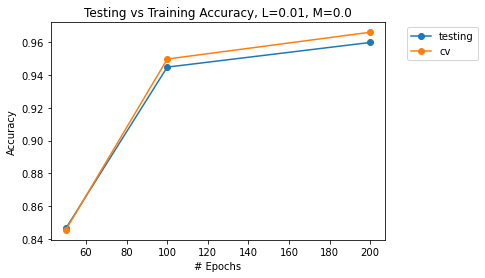

In [ ]:
plt.plot(epochs, plt_data[0]['mean_test_score'], marker='o', label="testing")
plt.plot(epochs, plt_data[0]['mean_train_score'], marker='o', label="cv")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.title('Testing vs Training Accuracy, L=0.01, M=0.0')
plt.ylabel('Accuracy')
plt.xlabel('# Epochs')
plt.show()

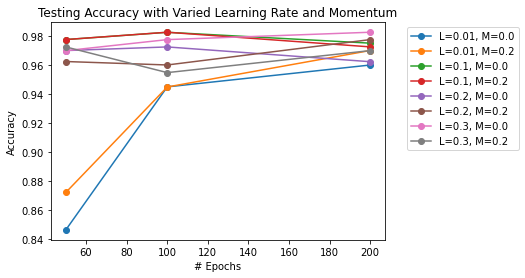

In [ ]:
for i in range(len(plt_data)):
    plt.plot(epochs, plt_data[i]['mean_test_score'], marker='o', label=labels[i])
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.title('Testing Accuracy with Varied Learning Rate and Momentum')
plt.ylabel('Accuracy')
plt.xlabel('# Epochs')
plt.show()

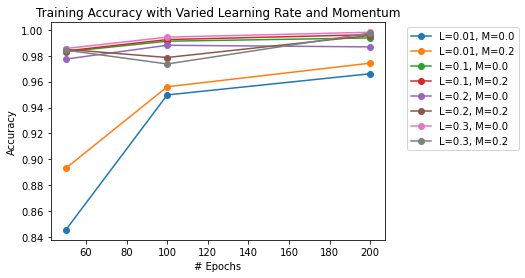

In [ ]:
for i in range(len(plt_data)):
    plt.plot(epochs, plt_data[i]['mean_train_score'], marker='o', label=labels[i])
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.title('Training Accuracy with Varied Learning Rate and Momentum')
plt.ylabel('Accuracy')
plt.xlabel('# Epochs')
plt.show()

In [10]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = len(features), activation = 'relu', input_dim=len(features)))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


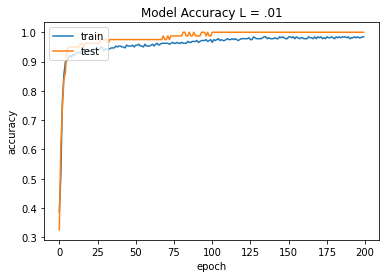

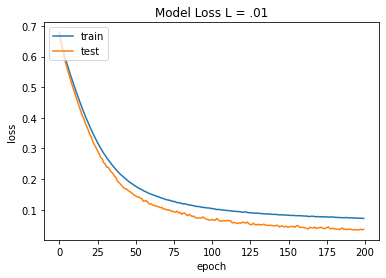

6/6 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 0.8830


0.8830409646034241

In [11]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(X_train_norm, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(X_test_norm, y_test)